In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read uploaded file
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()


Saving updated_u2714523_DS7010_Credit.csv to updated_u2714523_DS7010_Credit.csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,160000,2,2,2,33,2,2,3,2,0,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,150000,2,1,2,34,1,-1,-1,-2,-2,...,0,0,0,53,0,0,0,0,0,0
2,10000,1,2,1,50,1,2,0,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,220000,2,1,2,29,0,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,310000,2,1,2,32,1,-2,-1,0,0,...,326,-235,-235,0,326,0,0,0,1200,0


In [3]:
selected_columns = [
    "LIMIT_BAL", "SEX", "EDUCATION", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
    "default payment next month"
]

df = df[selected_columns]
df.head()


,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,160000,2,2,33,2,2,3,2,0,0,...,164310,162681,163005,15000,0,0,6100,12300,6100,0
1,150000,2,1,34,1,-1,-1,-2,-2,-2,...,0,0,0,53,0,0,0,0,0,0
2,10000,1,2,50,1,2,0,0,0,0,...,8067,8227,8400,2,1281,1134,294,305,1000,0
3,220000,2,1,29,0,0,0,0,0,0,...,218513,131660,134346,9100,9000,7887,4800,4900,6000,1
4,310000,2,1,32,1,-2,-1,0,0,-2,...,326,-235,-235,0,326,0,0,0,1200,0


In [4]:
# Separate features and target
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


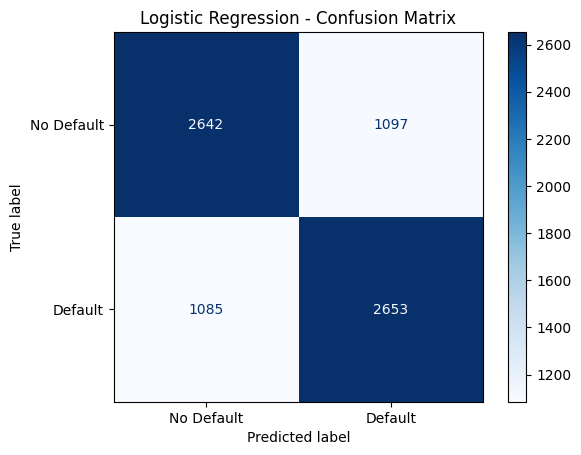

In [5]:
# Train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}


In [7]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7043303795351948


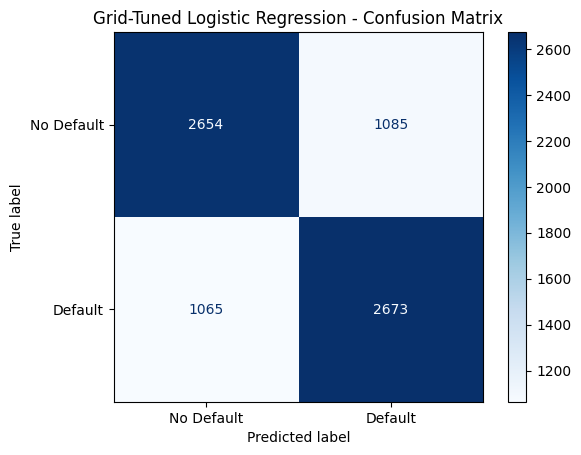

In [8]:
# Predict using the best estimator
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test)

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best, labels=[0, 1])
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=["No Default", "Default"])
disp_best.plot(cmap=plt.cm.Blues)
plt.title("Grid-Tuned Logistic Regression - Confusion Matrix")
plt.show()


In [9]:
from sklearn.metrics import classification_report

print("Classification Report (Grid Tuned Logistic Regression):")
print(classification_report(y_test, y_pred_best))


Classification Report (Grid Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3739
           1       0.71      0.72      0.71      3738

    accuracy                           0.71      7477
   macro avg       0.71      0.71      0.71      7477
weighted avg       0.71      0.71      0.71      7477



In [10]:
# Cost-sensitive Logistic Regression using 'balanced' weights
cost_sensitive_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear'  # works well with small/mid datasets and supports class_weight
)

# Train the model
cost_sensitive_lr.fit(X_train, y_train)

# Predict
y_pred_cs = cost_sensitive_lr.predict(X_test)


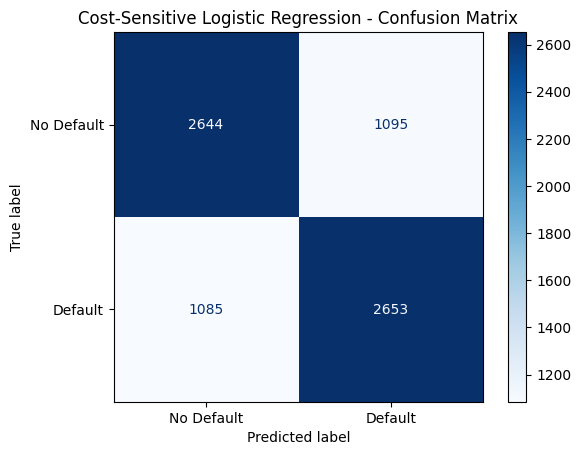

In [11]:
# Confusion Matrix
cm_cs = confusion_matrix(y_test, y_pred_cs, labels=[0, 1])
disp_cs = ConfusionMatrixDisplay(confusion_matrix=cm_cs, display_labels=["No Default", "Default"])
disp_cs.plot(cmap=plt.cm.Blues)
plt.title("Cost-Sensitive Logistic Regression - Confusion Matrix")
plt.show()


In [12]:
from sklearn.metrics import classification_report

print("Classification Report (Cost-Sensitive Logistic Regression):")
print(classification_report(y_test, y_pred_cs))


Classification Report (Cost-Sensitive Logistic Regression):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3739
           1       0.71      0.71      0.71      3738

    accuracy                           0.71      7477
   macro avg       0.71      0.71      0.71      7477
weighted avg       0.71      0.71      0.71      7477



In [13]:
# You can use this if you want to manually increase weight for class 1
custom_weights = {0: 1, 1: 3}  # You can experiment with 1:4, 1:5 etc.

custom_lr = LogisticRegression(
    class_weight=custom_weights,
    max_iter=1000,
    solver='liblinear'
)
custom_lr.fit(X_train, y_train)
y_pred_custom = custom_lr.predict(X_test)

# Evaluation
print("Custom Weighted Logistic Regression:")
print(classification_report(y_test, y_pred_custom))


Custom Weighted Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.24      0.37      3739
           1       0.56      0.95      0.70      3738

    accuracy                           0.60      7477
   macro avg       0.70      0.60      0.54      7477
weighted avg       0.70      0.60      0.54      7477



In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


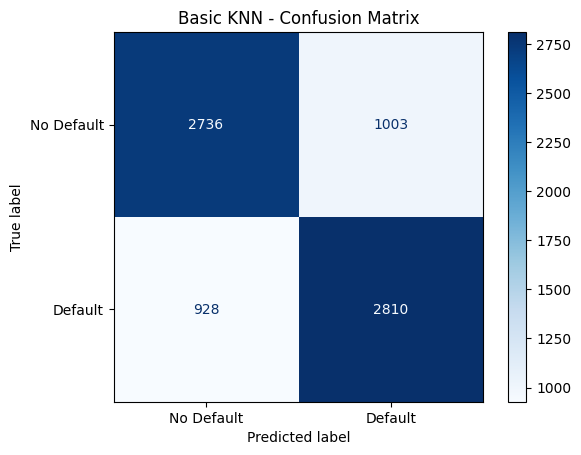

Basic KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3739
           1       0.74      0.75      0.74      3738

    accuracy                           0.74      7477
   macro avg       0.74      0.74      0.74      7477
weighted avg       0.74      0.74      0.74      7477



In [16]:
# Basic KNN
knn_basic = KNeighborsClassifier()
knn_basic.fit(X_train, y_train)
y_pred_knn_basic = knn_basic.predict(X_test)

# Confusion Matrix
cm_knn_basic = confusion_matrix(y_test, y_pred_knn_basic)
disp_basic = ConfusionMatrixDisplay(cm_knn_basic, display_labels=["No Default", "Default"])
disp_basic.plot(cmap=plt.cm.Blues)
plt.title("Basic KNN - Confusion Matrix")
plt.show()

# Classification Report
print("Basic KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_basic))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


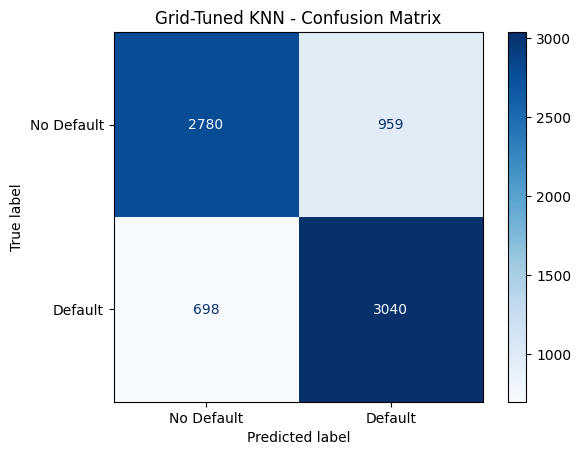

Grid-Tuned KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3739
           1       0.76      0.81      0.79      3738

    accuracy                           0.78      7477
   macro avg       0.78      0.78      0.78      7477
weighted avg       0.78      0.78      0.78      7477



In [17]:
# Grid Search for best K and weights
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_knn.fit(X_train, y_train)

# Best model
best_knn = grid_knn.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test)

# Confusion Matrix
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
disp_tuned = ConfusionMatrixDisplay(cm_knn_tuned, display_labels=["No Default", "Default"])
disp_tuned.plot(cmap=plt.cm.Blues)
plt.title("Grid-Tuned KNN - Confusion Matrix")
plt.show()

# Classification Report
print("Grid-Tuned KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_tuned))


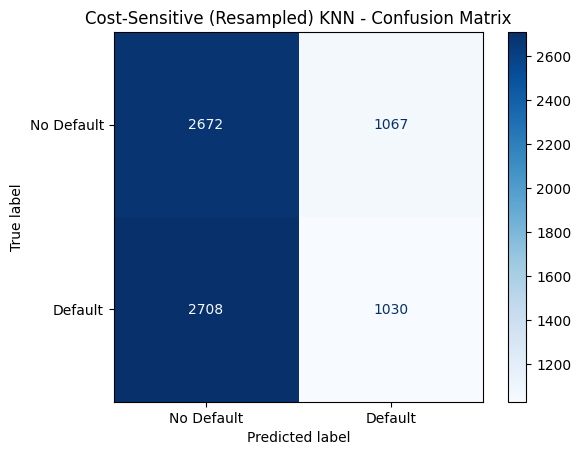

Cost-Sensitive KNN Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.71      0.59      3739
           1       0.49      0.28      0.35      3738

    accuracy                           0.50      7477
   macro avg       0.49      0.50      0.47      7477
weighted avg       0.49      0.50      0.47      7477



In [19]:
from sklearn.utils import resample

# Combine X_train and y_train into a DataFrame for resampling
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.Series(y_train)

# Combine into one DataFrame
train_combined = pd.concat([X_train_df, y_train_df.rename("target")], axis=1)

# Separate majority and minority classes
minority = train_combined[train_combined["target"] == 1]
majority = train_combined[train_combined["target"] == 0]

# Upsample the minority class
minority_upsampled = resample(minority,
                               replace=True,
                               n_samples=len(majority),
                               random_state=42)

# Combine majority and upsampled minority
balanced_train = pd.concat([majority, minority_upsampled])

# Shuffle the data
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target again
X_balanced = balanced_train.drop("target", axis=1)
y_balanced = balanced_train["target"]

# ✅ Drop or fill any NaN values
X_balanced = X_balanced.fillna(0)

# Train KNN on balanced data
knn_cost_sensitive = KNeighborsClassifier(n_neighbors=5)
knn_cost_sensitive.fit(X_balanced, y_balanced)

# Predict on test set
y_pred_knn_cs = knn_cost_sensitive.predict(X_test)

# Confusion Matrix
cm_knn_cs = confusion_matrix(y_test, y_pred_knn_cs)
disp_cs = ConfusionMatrixDisplay(confusion_matrix=cm_knn_cs, display_labels=["No Default", "Default"])
disp_cs.plot(cmap=plt.cm.Blues)
plt.title("Cost-Sensitive (Resampled) KNN - Confusion Matrix")
plt.show()

# Classification Report
print("Cost-Sensitive KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_cs))


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dictionary of model predictions
model_predictions = {
    "Basic KNN": y_pred_knn_basic,
    "Grid-Tuned KNN": y_pred_knn_tuned,
    "Cost-Sensitive KNN": y_pred_knn_cs,
    "Initial Logistic Regression": y_pred,
    "Grid-Tuned Logistic Regression": y_pred_best,
    "Cost-Sensitive Logistic Regression": y_pred_cs
}

# Evaluate each model
results = []
for name, preds in model_predictions.items():
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, preds), 4),
        "Precision": round(precision_score(y_test, preds), 4),
        "Recall": round(recall_score(y_test, preds), 4),
        "F1 Score": round(f1_score(y_test, preds), 4)
    })

# Create and show the DataFrame
comparison_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
1,Grid-Tuned KNN,0.7784,0.7602,0.8133,0.7858
0,Basic KNN,0.7417,0.7370,0.7517,0.7443
4,Grid-Tuned Logistic Regression,0.7125,0.7113,0.7151,0.7132
5,Cost-Sensitive Logistic Regression,0.7084,0.7078,0.7097,0.7088
3,Initial Logistic Regression,0.7082,0.7075,0.7097,0.7086
2,Cost-Sensitive KNN,0.4951,0.4912,0.2755,0.3530
